In [5]:
import import_ipynb
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from image_processing_functions import read_image, canny_edge_response, canny_edge_adapted, \
    automatic_canny_edge_response, harris_corner_response, hough_line_detect_response, \
    hough_line_intersections, houghp_line_detect_response, houghp_line_points


In [7]:
filename = 'C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 1/data/0.jpg'

# Hierarchical clusterization of obtained data from Hough transform - clustering the obtained lines or their intersections?

{1: [[774, 1641, 1244, -1321], [770, 1640, 1240, -1322]],
 2: [[752, 1655, 1273, -1298]],
 3: [[794, 1626, 1211, -1344]],
 4: [[843, 1652, 1313, -1310]],
 5: [[680, 1643, 1200, -1311]],
 6: [[204, 1586, 879, -1336]],
 7: [[221, 1580, 844, -1353]],
 8: [[189, 1593, 914, -1317]],
 9: [[141, 1600, 968, -1282]],
 10: [[45, 1557, 771, -1353], [47, 1557, 773, -1353]],
 11: [[111, 1573, 837, -1337], [114, 1574, 840, -1336]],
 12: [[131, 1569, 806, -1353], [135, 1570, 809, -1352]],
 13: [[291, 1595, 915, -1338]],
 14: [[450, 1615, 1022, -1329]],
 15: [[361, 1610, 984, -1324]],
 16: [[609, 1630, 1130, -1323]],
 17: [[519, 1629, 1092, -1315]],
 18: [[-993, -1127, 1127, 993],
  [-989, -1131, 1131, 989],
  [-991, -1129, 1129, 991],
  [-994, -1126, 1126, 994]],
 19: [[-1624, 498, 1319, 1070]],
 20: [[-1630, 455, 1304, 1078]],
 21: [[-1610, 421, 1334, 993]],
 22: [[-1580, 323, 1374, 844], [-1578, 316, 1375, 837]],
 23: [[-1582, 279, 1362, 851]],
 24: [[-1596, 349, 1348, 922]],
 25: [[-1516, -60, 142

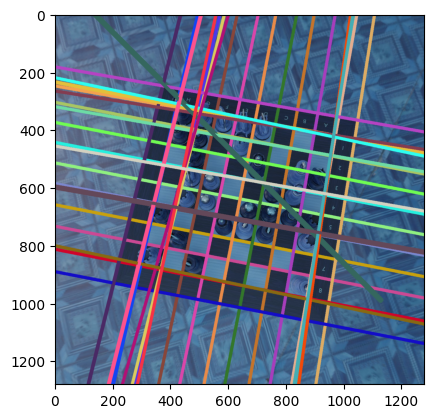

In [62]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist, squareform


# hierarchical clustering of lines using the distance between them
# followed by the augmentation of the lines to form a single one

def line_distance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))


def cluster_lines(lines):
    distances = pdist(lines, metric=line_distance)
    links = linkage(distances, method='single')
    cluster_ids = fcluster(links, 15, criterion='distance')
    n_clusters = np.unique(cluster_ids)

    image_copy = cv.imread(filename)
    # image_copy = cv.cvtColor(image_copy, cv.COLOR_BGR2RGB)
    cluster_colors = {i: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in
                      n_clusters}
    for line, cluster_id in zip(lines, cluster_ids):
        cv.line(image_copy, (line[0], line[1]), (line[2], line[3]), cluster_colors[cluster_id], 10)

    plt.imshow(image_copy)

    cluster_dict = {key: [] for key in n_clusters}
    for i in range(len(cluster_ids)):
        cluster_dict[cluster_ids[i]].append(lines[i])

    return cluster_dict


lines = hough_line_detect_response(read_image(filename))
cluster_lines(lines['coords'])

## Calculating the mean of these lines in order to obtain a single one

{1: (772.0, 1640.5, 1242.0, -1321.5),
 2: (752.0, 1655.0, 1273.0, -1298.0),
 3: (794.0, 1626.0, 1211.0, -1344.0),
 4: (843.0, 1652.0, 1313.0, -1310.0),
 5: (680.0, 1643.0, 1200.0, -1311.0),
 6: (204.0, 1586.0, 879.0, -1336.0),
 7: (221.0, 1580.0, 844.0, -1353.0),
 8: (189.0, 1593.0, 914.0, -1317.0),
 9: (141.0, 1600.0, 968.0, -1282.0),
 10: (46.0, 1557.0, 772.0, -1353.0),
 11: (112.5, 1573.5, 838.5, -1336.5),
 12: (133.0, 1569.5, 807.5, -1352.5),
 13: (291.0, 1595.0, 915.0, -1338.0),
 14: (450.0, 1615.0, 1022.0, -1329.0),
 15: (361.0, 1610.0, 984.0, -1324.0),
 16: (609.0, 1630.0, 1130.0, -1323.0),
 17: (519.0, 1629.0, 1092.0, -1315.0),
 18: (-991.75, -1128.25, 1128.25, 991.75),
 19: (-1624.0, 498.0, 1319.0, 1070.0),
 20: (-1630.0, 455.0, 1304.0, 1078.0),
 21: (-1610.0, 421.0, 1334.0, 993.0),
 22: (-1579.0, 319.5, 1374.5, 840.5),
 23: (-1582.0, 279.0, 1362.0, 851.0),
 24: (-1596.0, 349.0, 1348.0, 922.0),
 25: (-1516.0, -59.0, 1428.0, 512.0),
 26: (-1519.0, -19.0, 1434.0, 501.0),
 27: (-

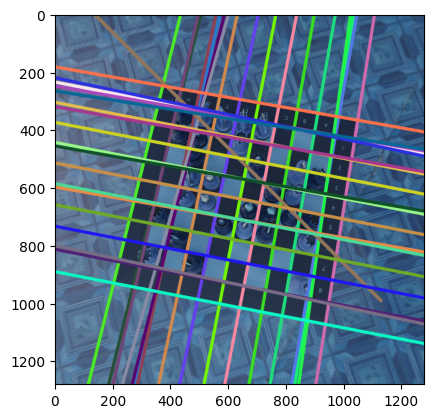

In [48]:
def augment_cluster_lines(cluster_dict):
    augmented_cluster = {key: (np.mean(np.array(values)[:, 0]), np.mean(np.array(values)[:, 1]), np.mean(np.array(values)[:, 2]), np.mean(np.array(values)[:, 3])) for key, values in cluster_dict.items() if values != []}

    image_copy = cv.imread(filename)
    cluster_colors = {i + 1: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in range(len(augmented_cluster))}
    for cluster_id, cluster_line in augmented_cluster.items():
        cv.line(image_copy, (round(cluster_line[0]), round(cluster_line[1])), (round(cluster_line[2]), round(cluster_line[3])), cluster_colors[cluster_id], 10)

    plt.imshow(image_copy)
    return augmented_cluster

clusters = cluster_lines(lines['coords'])
augment_cluster_lines(clusters)

# Hierarchical clusterization of line intersections

{1: [[862.0, 609.0], [862.0, 612.0]],
 2: [[874.0, 545.0]],
 3: [[1004.0, 639.0], [1005.0, 634.0]],
 4: [[1015.0, 572.0]],
 5: [[942.0, 558.0], [944.0, 558.0], [946.0, 559.0], [946.0, 559.0]],
 6: [[932.0, 621.0],
  [932.0, 625.0],
  [935.0, 622.0],
  [935.0, 626.0],
  [935.0, 626.0],
  [936.0, 622.0],
  [936.0, 622.0],
  [936.0, 626.0]],
 7: [[803.0, 672.0], [807.0, 672.0], [812.0, 673.0], [815.0, 674.0]],
 8: [[779.0, 667.0]],
 9: [[850.0, 681.0]],
 10: [[767.0, 736.0], [767.0, 737.0], [768.0, 730.0]],
 11: [[838.0, 750.0], [838.0, 750.0], [839.0, 743.0]],
 12: [[911.0, 756.0], [912.0, 756.0], [915.0, 756.0], [917.0, 757.0]],
 13: [[910.0, 763.0],
  [910.0, 763.0],
  [910.0, 764.0],
  [910.0, 764.0],
  [914.0, 763.0],
  [914.0, 764.0],
  [915.0, 765.0],
  [916.0, 764.0]],
 14: [[882.0, 751.0], [886.0, 751.0], [891.0, 752.0], [894.0, 753.0]],
 15: [[891.0, 759.0], [892.0, 760.0], [894.0, 760.0], [895.0, 761.0]],
 16: [[899.0, 761.0], [900.0, 762.0], [903.0, 761.0], [904.0, 762.0]],
 1

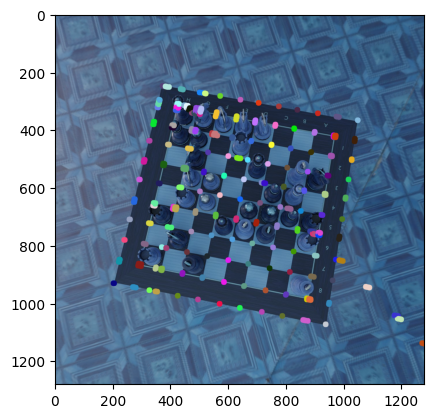

In [51]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist


def cluster_points(points):
    distances = pdist(points, metric='euclidean')
    links = linkage(distances, method='ward')
    clusters = fcluster(links, 15, criterion='distance')
    unique_clusters = np.unique(clusters)

    image_copy = cv.imread(filename)
    # image_copy = cv.cvtColor(image_copy, cv.COLOR_BGR2RGB)
    cluster_colors = {i: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in unique_clusters}
    for point, cluster_id in zip(points, clusters):
        cv.circle(image_copy, (round(point[0]), round(point[1])), 10, cluster_colors[cluster_id], -1)

    plt.imshow(image_copy)

    cluster_dict = {key: [] for key in unique_clusters}
    for i in range(len(clusters)):
        cluster_dict[clusters[i]].append(points[i])

    return cluster_dict

inters = hough_line_intersections(read_image(filename))
cluster_points(inters['list'])

## Transforming the clusters of points into a single one

{1: (862.0, 610.5),
 2: (874.0, 545.0),
 3: (1004.5, 636.5),
 4: (1015.0, 572.0),
 5: (944.5, 558.5),
 6: (934.625, 623.75),
 7: (809.25, 672.75),
 8: (779.0, 667.0),
 9: (850.0, 681.0),
 10: (767.3333, 734.3333),
 11: (838.3333, 747.6667),
 12: (913.75, 756.25),
 13: (912.375, 763.75),
 14: (888.25, 751.75),
 15: (893.0, 760.0),
 16: (901.5, 761.5),
 17: (923.25, 694.75),
 18: (983.0, 774.0),
 19: (993.0, 709.0),
 20: (1275.75, 1139.5),
 21: (1179.75, 1043.25),
 22: (1191.0, 1054.5),
 23: (569.0, 1002.0),
 24: (639.0, 1016.0),
 25: (584.0, 926.5),
 26: (653.5, 940.5),
 27: (742.0, 879.0),
 28: (812.0, 892.0),
 29: (754.0, 807.0),
 30: (825.0, 821.0),
 31: (715.0, 1030.0),
 32: (786.0, 1044.0),
 33: (728.0, 955.5),
 34: (798.5, 970.0),
 35: (872.75, 985.25),
 36: (881.25, 987.0),
 37: (865.5, 1059.5),
 38: (947.5, 1000.5),
 39: (936.0, 1073.0),
 40: (1081.0, 944.5),
 41: (988.75, 852.5),
 42: (971.0, 849.0),
 43: (900.75, 835.5),
 44: (889.5, 907.75),
 45: (960.0, 921.0),
 46: (203.0, 

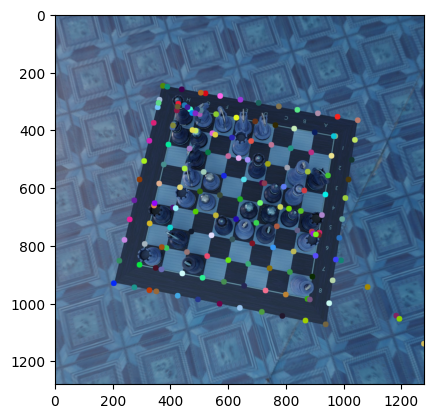

In [52]:
def augment_cluster_points(cluster_dict):
    augmented_cluster = {key: (np.mean(np.array(values)[:, 0]), np.mean(np.array(values)[:, 1])) for key, values in cluster_dict.items() if values != []}

    image_copy = cv.imread(filename)
    cluster_colors = {i + 1: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in range(len(augmented_cluster))}
    for cluster_id, cluster_point in augmented_cluster.items():
        cv.circle(image_copy, (round(cluster_point[0]), round(cluster_point[1])), 10, cluster_colors[cluster_id], -1)

    plt.imshow(image_copy)
    return augmented_cluster

clusters = cluster_points(inters['list'])
augment_cluster_points(clusters)

# Hierarchical clustering of lines obtained from HoughLinesP()

{1: [[222, 857, 616, 934]],
 2: [[206, 929, 474, 982]],
 3: [[397, 968, 693, 1026]],
 4: [[389, 250, 946, 807], [391, 250, 946, 805], [380, 248, 944, 812]],
 5: [[383, 249, 974, 840]],
 6: [[418, 255, 909, 763]],
 7: [[532, 918, 949, 1000]],
 8: [[668, 1022, 937, 1075]],
 9: [[400, 383, 894, 479], [400, 384, 883, 478]],
 10: [[400, 382, 951, 489]],
 11: [[340, 374, 957, 494]],
 12: [[357, 303, 963, 420]],
 13: [[410, 317, 968, 425]],
 14: [[410, 331, 1036, 430]],
 15: [[324, 438, 938, 558]],
 16: [[461, 463, 942, 557]],
 17: [[241, 781, 961, 921], [240, 783, 961, 923]],
 18: [[291, 572, 994, 708]],
 19: [[308, 504, 1004, 639]],
 20: [[275, 640, 983, 778]],
 21: [[258, 711, 972, 849]],
 22: [[292, 867, 950, 995]],
 23: [[356, 304, 837, 397]],
 24: [[380, 519, 865, 613]],
 25: [[370, 248, 642, 296]],
 26: [[648, 298, 899, 343]],
 27: [[860, 337, 1043, 370]],
 28: [[367, 880, 508, 272], [365, 884, 507, 271]],
 29: [[369, 878, 499, 315]],
 30: [[276, 943, 434, 258], [280, 943, 438, 259]],


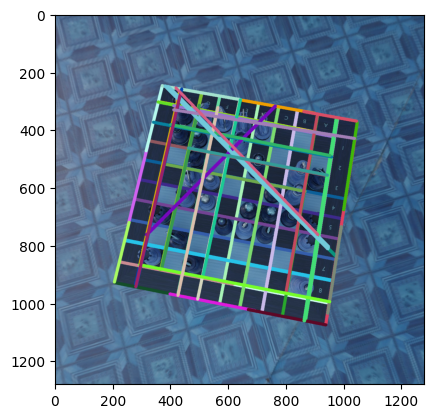

In [56]:
def houghp_cluster_lines(img):
    houghp_lines = houghp_line_detect_response(img, threshold=90, minLineLength=100, maxLineGap=150)
    list_of_lines = []
    for line_list in houghp_lines['list'].tolist():
        list_of_lines.append(line_list.pop())
    return cluster_lines(list_of_lines)

houghp_cluster_lines(read_image(filename))

{1: (222.0, 857.0, 616.0, 934.0),
 2: (206.0, 929.0, 474.0, 982.0),
 3: (397.0, 968.0, 693.0, 1026.0),
 4: (386.6666666666667, 249.33333333333334, 945.3333333333334, 808.0),
 5: (383.0, 249.0, 974.0, 840.0),
 6: (418.0, 255.0, 909.0, 763.0),
 7: (532.0, 918.0, 949.0, 1000.0),
 8: (668.0, 1022.0, 937.0, 1075.0),
 9: (400.0, 383.5, 888.5, 478.5),
 10: (400.0, 382.0, 951.0, 489.0),
 11: (340.0, 374.0, 957.0, 494.0),
 12: (357.0, 303.0, 963.0, 420.0),
 13: (410.0, 317.0, 968.0, 425.0),
 14: (410.0, 331.0, 1036.0, 430.0),
 15: (324.0, 438.0, 938.0, 558.0),
 16: (461.0, 463.0, 942.0, 557.0),
 17: (240.5, 782.0, 961.0, 922.0),
 18: (291.0, 572.0, 994.0, 708.0),
 19: (308.0, 504.0, 1004.0, 639.0),
 20: (275.0, 640.0, 983.0, 778.0),
 21: (258.0, 711.0, 972.0, 849.0),
 22: (292.0, 867.0, 950.0, 995.0),
 23: (356.0, 304.0, 837.0, 397.0),
 24: (380.0, 519.0, 865.0, 613.0),
 25: (370.0, 248.0, 642.0, 296.0),
 26: (648.0, 298.0, 899.0, 343.0),
 27: (860.0, 337.0, 1043.0, 370.0),
 28: (366.0, 882.0, 

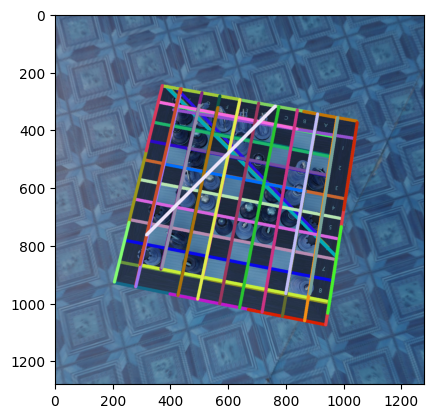

In [57]:
houghp_clusters = houghp_cluster_lines(read_image(filename))
augment_cluster_lines(houghp_clusters)

# Hierarchical clustering of the points that mark as coordinates of the lines from HoughLinesP()

{1: [[774, 321], [773, 321], [762, 318]],
 2: [[909, 346], [899, 343], [908, 345]],
 3: [[838, 332], [839, 333]],
 4: [[860, 337]],
 5: [[837, 397]],
 6: [[1037, 432], [1036, 430]],
 7: [[1045, 375], [1043, 370]],
 8: [[978, 358], [977, 358], [974, 358], [973, 357]],
 9: [[963, 420], [968, 425]],
 10: [[957, 494], [951, 489]],
 11: [[894, 479], [883, 478]],
 12: [[938, 558], [942, 557]],
 13: [[865, 613]],
 14: [[936, 1075], [937, 1075]],
 15: [[866, 1061], [863, 1061], [861, 1061]],
 16: [[961, 921], [961, 923]],
 17: [[949, 1000], [950, 995]],
 18: [[943, 1035]],
 19: [[881, 968]],
 20: [[994, 708]],
 21: [[990, 735]],
 22: [[1004, 639]],
 23: [[998, 677]],
 24: [[972, 849], [974, 840]],
 25: [[946, 807], [946, 805], [944, 812]],
 26: [[983, 778]],
 27: [[909, 763]],
 28: [[640, 296], [639, 296], [648, 298], [642, 296], [641, 296]],
 29: [[704, 308]],
 30: [[570, 283]],
 31: [[563, 323]],
 32: [[508, 272], [507, 271]],
 33: [[499, 315]],
 34: [[320, 456]],
 35: [[315, 473]],
 36: [[3

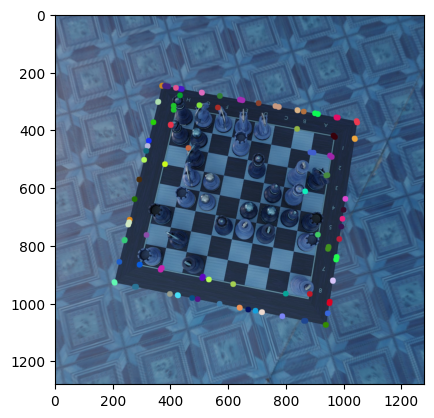

In [60]:
def houghp_cluster_points(img):
    point_list = houghp_line_points(read_image(filename))
    return cluster_points(point_list['list'])

clusters_p = houghp_cluster_points(read_image(filename))
clusters_p

{1: (769.6666666666666, 320.0),
 2: (905.3333333333334, 344.6666666666667),
 3: (838.5, 332.5),
 4: (860.0, 337.0),
 5: (837.0, 397.0),
 6: (1036.5, 431.0),
 7: (1044.0, 372.5),
 8: (975.5, 357.75),
 9: (965.5, 422.5),
 10: (954.0, 491.5),
 11: (888.5, 478.5),
 12: (940.0, 557.5),
 13: (865.0, 613.0),
 14: (936.5, 1075.0),
 15: (863.3333333333334, 1061.0),
 16: (961.0, 922.0),
 17: (949.5, 997.5),
 18: (943.0, 1035.0),
 19: (881.0, 968.0),
 20: (994.0, 708.0),
 21: (990.0, 735.0),
 22: (1004.0, 639.0),
 23: (998.0, 677.0),
 24: (973.0, 844.5),
 25: (945.3333333333334, 808.0),
 26: (983.0, 778.0),
 27: (909.0, 763.0),
 28: (642.0, 296.4),
 29: (704.0, 308.0),
 30: (570.0, 283.0),
 31: (563.0, 323.0),
 32: (507.5, 271.5),
 33: (499.0, 315.0),
 34: (320.0, 456.0),
 35: (315.0, 473.0),
 36: (324.0, 438.0),
 37: (308.0, 504.0),
 38: (380.0, 519.0),
 39: (461.0, 463.0),
 40: (370.5, 247.5),
 41: (385.75, 249.25),
 42: (435.0, 258.3333333333333),
 43: (418.0, 255.0),
 44: (432.0, 281.0),
 45:

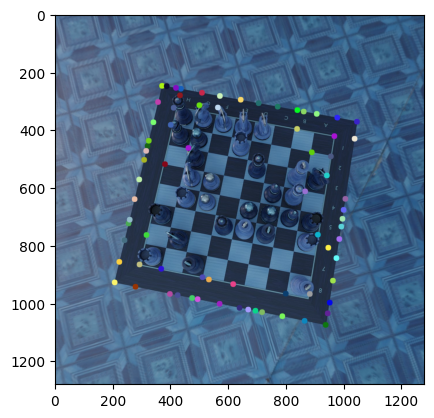

In [61]:
augment_cluster_points(clusters_p)